In [1]:
# Decison Tree

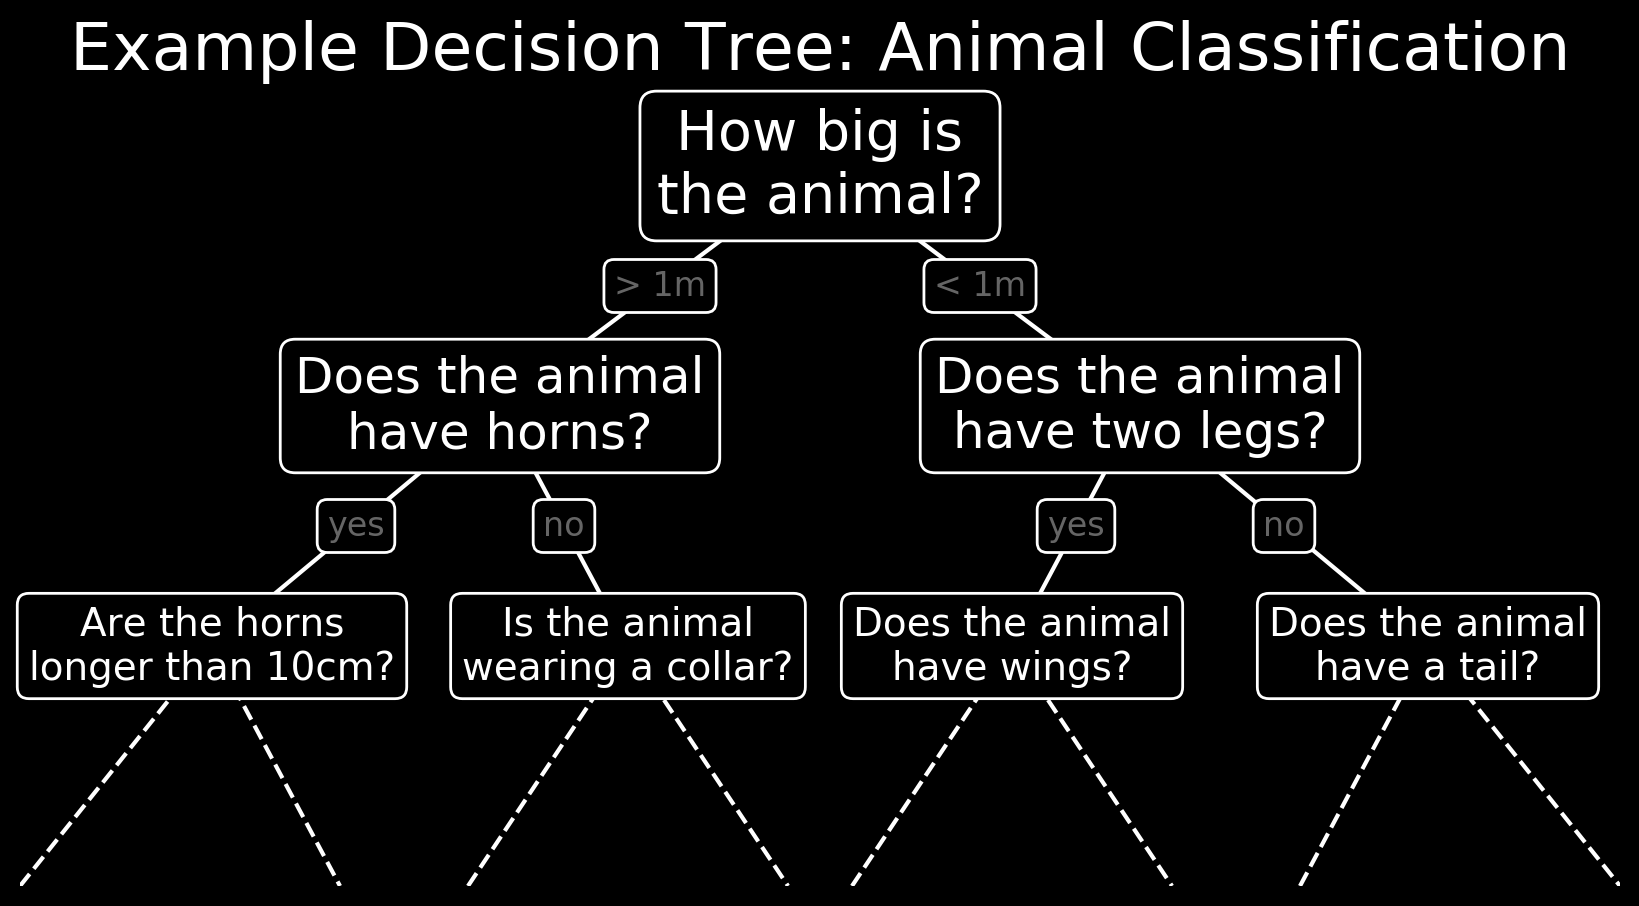

In [2]:
import matplotlib.pyplot as plt

def plot_example_decision_tree():
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
    ax.set_title('Example Decision Tree: Animal Classification', size=24)
    # Disable color cycling for lines
    ax.set_prop_cycle(color=[plt.rcParams['lines.color']])

    def text(ax, x, y, t, size=20, **kwargs):
        ax.text(
            x, y, t, ha='center', va='center', size=size, 
            bbox=dict(boxstyle='round', ec=plt.rcParams['text.color'], fc=plt.rcParams['figure.facecolor']), 
            **kwargs
        )

    text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
    text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
    text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
    text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
    text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
    text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
    text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)
    text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
    text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)
    text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.34, 0.45, "no", 12, alpha=0.4)
    text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.79, 0.45, "no", 12, alpha=0.4)
    ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-')
    ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-')
    ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-')
    ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--')
    ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--')
    ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--')
    ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--')
    ax.axis([0, 1, 0, 1])
    
plot_example_decision_tree()

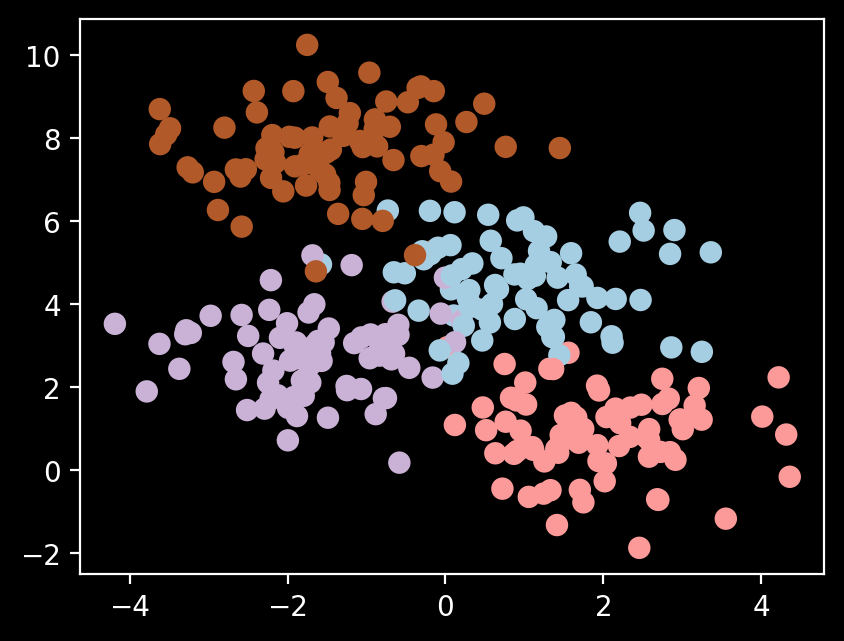

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

Let's use ipywidgets to make an interactive plot of a decision tree of various depths. We will use a convenience function visualize_tree() — feel free to check this lab's Appendix chapter if you'd like to see its full source code. Effectively, it generates a (static) plot of decision tree classifier with specified parameters

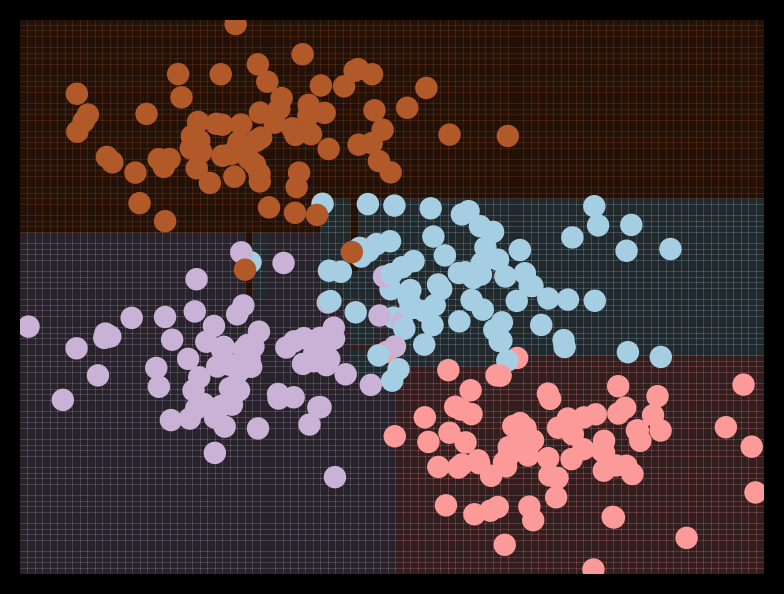

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.clim(y.min(), y.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-r')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-r')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())
        
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
clf = DecisionTreeClassifier()
visualize_tree(clf, X, y, boundaries=False)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interactive

def interactive_tree(depth=1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)
    plt.show()

interactive(interactive_tree, depth=(1, 5))

interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

Try changing the slider position and notice that at each increase in depth, every node is split in two except those nodes which contain only a single class. The result is a very fast non-parametric classification, and can be extremely useful in practice.

# Overfitting

One issue with decision trees is that it is very easy to create trees which overfit the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
visualize_tree(clf, X[:200], y[:200], boundaries=False)

In [ ]:
Subset of the last 200 data points

In [ ]:
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of overfitting: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

# Ensemble of estimators

One possible way to address over-fitting is to use an ensemble method: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!
One of the most common ensemble methods is the random forest, in which the ensemble is made up of many decision trees which are in some way perturbed.
There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

In [7]:
import numpy as np
from ipywidgets import interact, IntSlider

def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    plt.show()
    
interact(fit_randomized_tree, random_state=IntSlider(
    min=0, max=100, description='Random state', style={'description_width': 'auto'}, continuous_update=False
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random state', style=SliderStyl…

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!

In [ ]:
# Creating a decision tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

# Regression

Above we were considering random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for th


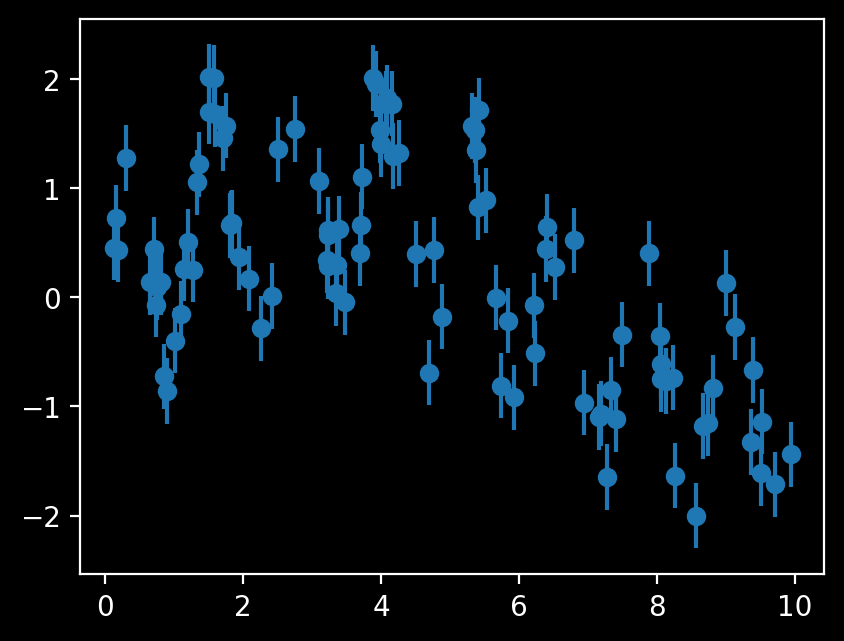

In [8]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

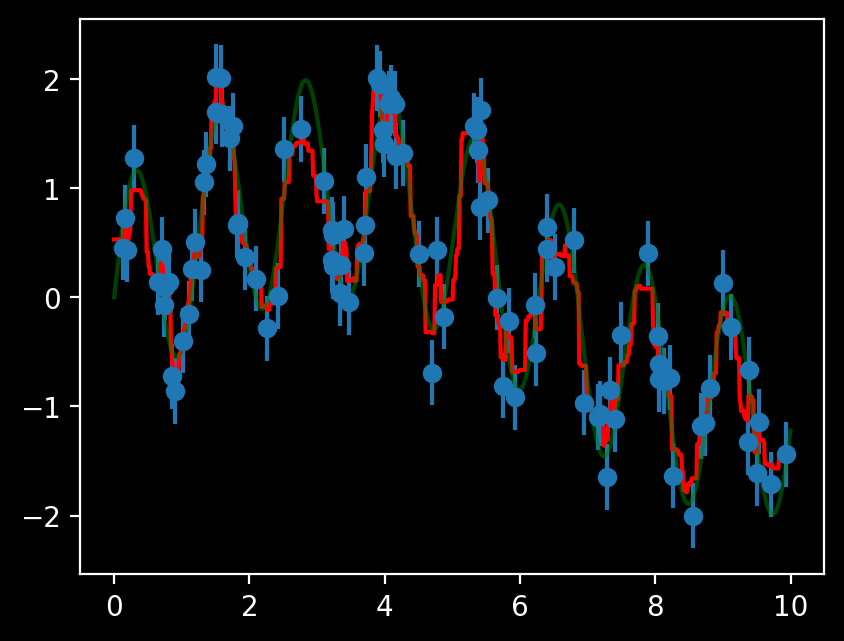

In [9]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-g', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

In [ ]:
# Hand written digits

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


remind us what we're looking at, we'll visualize the first few data points. The data in digits.images is a 1797x8x8 array, with each pixel value within an 8x8 grid.

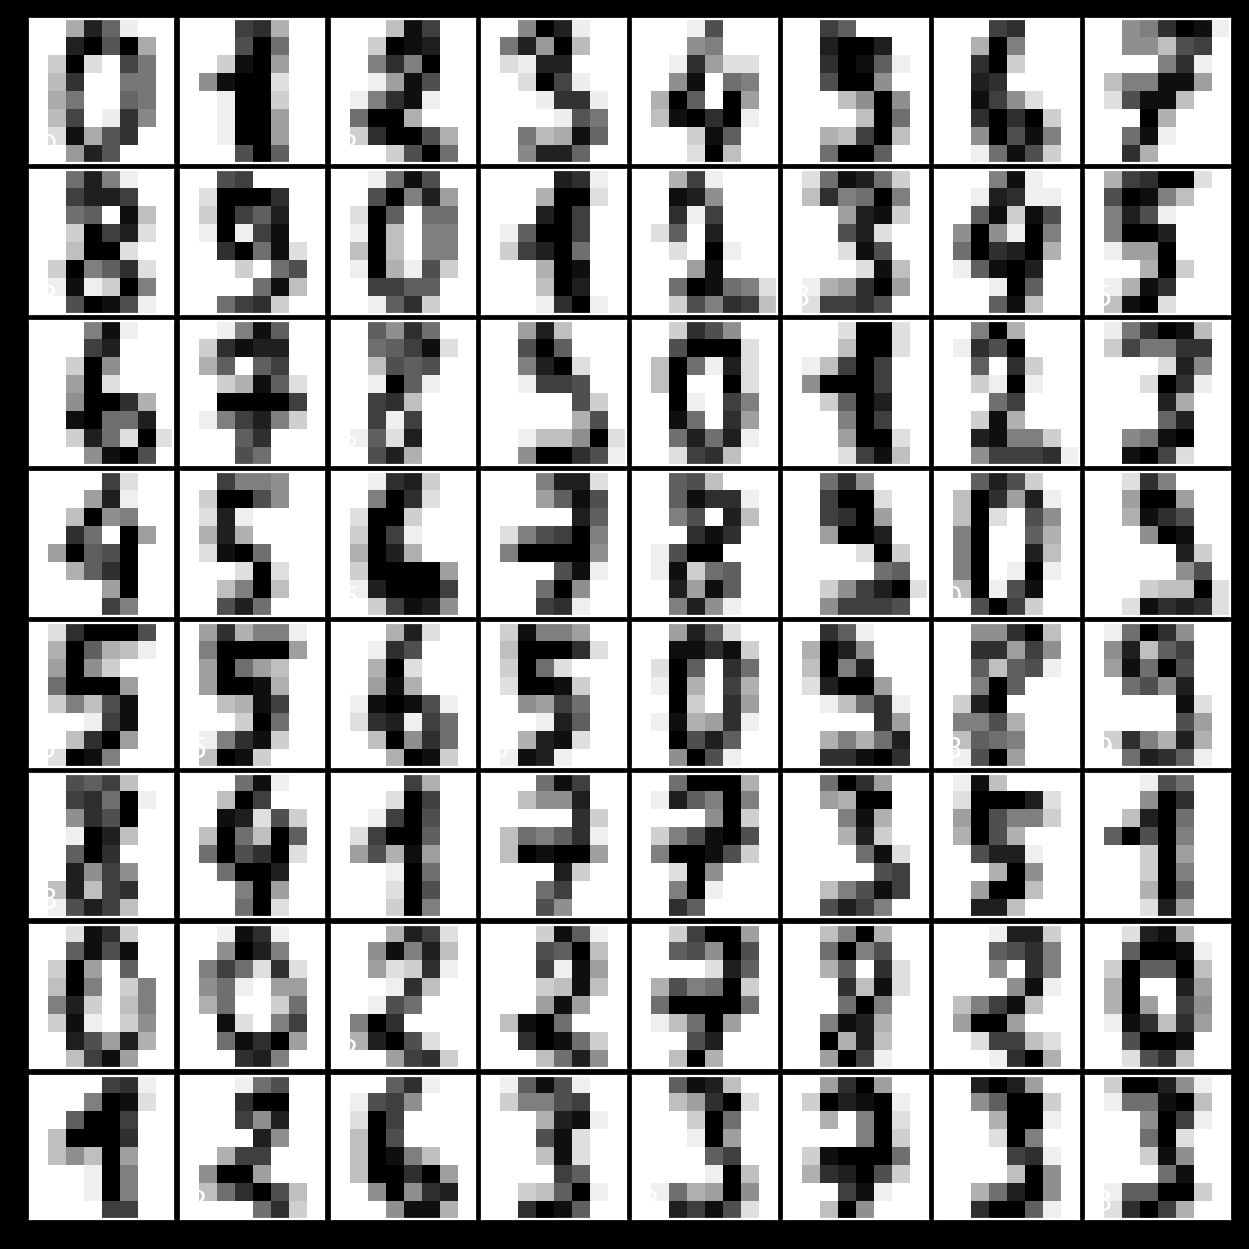

In [12]:
# Set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [14]:
metrics.accuracy_score(ypred, ytest)

0.8355555555555556

# Confusion matrix

Finally, for good measure, let's plot the confusion matrix, where each row represents the true label of the sample, while each column represents the predicted label.

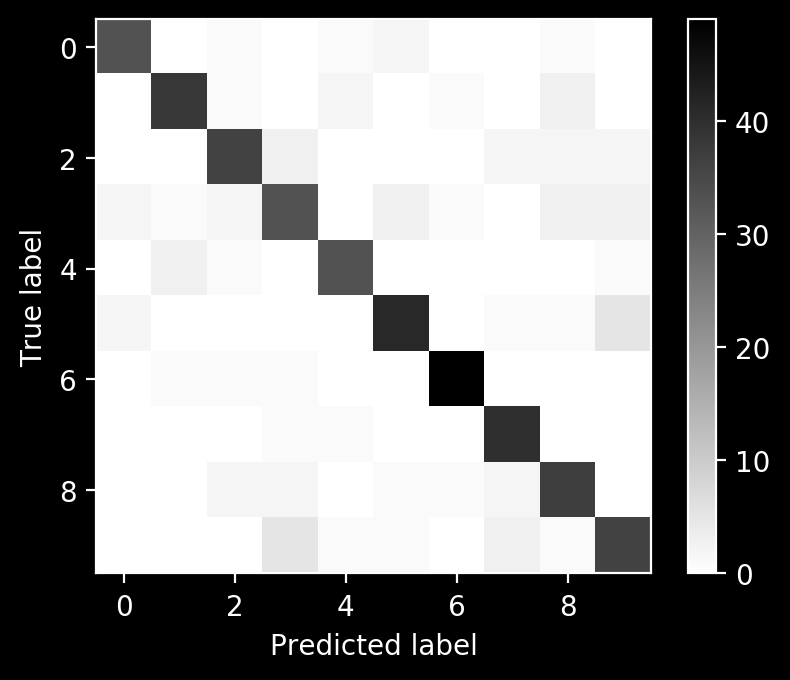

In [15]:
plt.imshow(metrics.confusion_matrix(ypred, ytest), cmap='binary', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label");

Exercises

Model accuracy: 0.8333333333333334


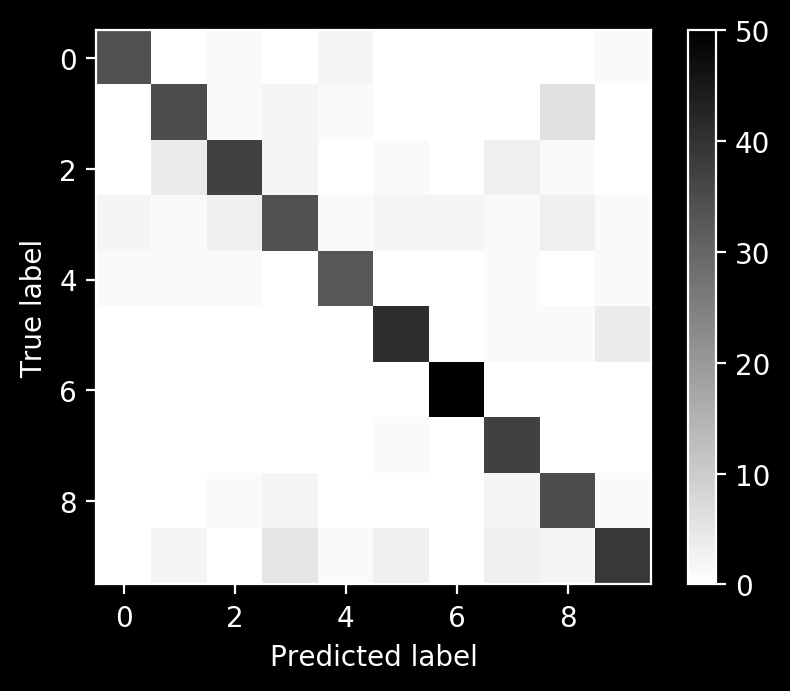

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

# Load data and split into train and test sets
digits = load_digits()
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
# Fit the model
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(f"Model accuracy: {metrics.accuracy_score(ypred, ytest)}")
# Plot confusion matrix
plt.imshow(metrics.confusion_matrix(ypred, ytest), cmap='binary', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label");